In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_unemployment = pd.read_csv("Unemployment_Data.csv")
df_GDP = pd.read_csv("gdp_growth_wide.csv")

In [2]:
df_unemployment

,Month,Total,"Men, 20 years and over","Women, 20 years and over",16 to 19 years old,White,Black or African American,Asian,Hispanic or Latino
0,Aug 2005,4.9,4.3,4.4,16.1,4.2,9.7,3.7,5.8
1,Sept 2005,5.0,4.5,4.6,15.5,4.4,9.4,4.3,6.4
2,Oct 2005,5.0,4.3,4.5,16.1,4.4,9.1,3.2,6.0
3,Nov 2005,5.0,4.3,4.6,17.0,4.3,10.6,3.6,6.1
4,Dec 2005,4.9,4.3,4.4,14.9,4.2,9.2,3.8,6.1
...,...,...,...,...,...,...,...,...,...
236,Apr 2025,4.2,4.0,3.7,13.0,3.8,6.3,3.0,5.2
237,May 2025,4.2,3.9,3.9,13.4,3.8,6.0,3.6,5.1
238,June 2025,4.1,3.9,3.6,14.4,3.6,6.8,3.5,4.8
239,July 2025,4.2,4.0,3.7,15.2,3.7,7.2,3.9,5.0


In [3]:
# Convert Month column to datetime (pandas infers the format)
df_unemployment['Month'] = pd.to_datetime(df_unemployment['Month'], errors='coerce')

# Filter from Jan 2010 onward
df_unemployment = df_unemployment[df_unemployment['Month'] >= '2010-01-01'].copy()

# Focus on Total unemployment
df_u = df_unemployment[['Month', 'Total']].copy()

C:\Users\yimol\AppData\Local\Temp\ipykernel_3676\2493313340.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_unemployment['Month'] = pd.to_datetime(df_unemployment['Month'], errors='coerce')


In [4]:
df_u

,Month,Total
53,2010-01-01,9.8
54,2010-02-01,9.8
55,2010-03-01,9.9
56,2010-04-01,9.9
57,2010-05-01,9.6
...,...,...
236,2025-04-01,4.2
237,2025-05-01,4.2
238,2025-06-01,4.1
239,2025-07-01,4.2


In [5]:
df_GDP = df_GDP.melt(
    id_vars="Year",
    var_name="Month",
    value_name="Rate"
)

# Step 2 — Convert "Year" + "Month" → datetime
df_GDP['Date'] = pd.to_datetime(
    df_GDP['Year'].astype(str) + df_GDP['Month'],
    format='%Y%b'
)

# Step 3 — Sort by date
df_GDP = df_GDP.sort_values('Date')

# Step 4 — Filter for 2010+
df_GDP = df_GDP[df_GDP['Date'] >= "2010-01-01"]

# Step 5 — Set Date as index
df_GDP = df_GDP.set_index('Date')

In [6]:
df_GDP = df_GDP.head(len(df_GDP) - 4)
df_GDP

,Year,Month,Rate
Date,,,
2010-01-01,2010,Jan,0.618533
2010-02-01,2010,Feb,0.223400
2010-03-01,2010,Mar,0.589284
2010-04-01,2010,Apr,0.392215
2010-05-01,2010,May,-0.071365
...,...,...,...
2025-04-01,2025,Apr,0.790918
2025-05-01,2025,May,-0.481482
2025-06-01,2025,Jun,0.871015


In [39]:
# Economic Damage Metric
u = df_u["Total"].values
g = df_GDP["Rate"].values

data = pd.DataFrame({"Date": df_GDP.index,"u": u, "g": g})
#data = data.dropna()
u_clean = data["u"].values
g_clean = data["g"].values
dates_clean = data["Date"].values

h = 6
w_unemployment = 1
w_GDP = 1
a = 0.3
b = 0.5

# Compute differences
delta_u = u_clean[h:] - u_clean[:-h]       # change in unemployment
delta_g = g_clean[h:] - g_clean[:-h]

# Apply max(0, ...)
delta_u_pos = np.maximum(0, delta_u)
delta_g_pos = np.maximum(0, delta_g)

# Compute economic damage metric
U = a * delta_u_pos + b * delta_g_pos

print("Economic damage metric U:", U)

Economic damage metric U: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.00000000e-02 1.17082987e-01 0.00000000e+00 5.97766827e-02
 3.76608626e-01 2.62999294e-03 0.00000000e+00 0.00000000e+00
 6.47980978e-01 2.67997869e-01 0.00000000e+00 7.37613198e-01
 5.61060396e-02 1.97560180e-01 0.00000000e+00 5.17747509e-01
 0.00000000e+00 0.00000000e+00 3.12449267e-01 0.00000000e+00
 7.19721657e-02 0.00000000e+00 6.80883389e-01 0.00000000e+00
 2.17855070e-02 3.17319727e-01 2.30404328e-01 0.00000000e+00
 2.72402924e-02 2.38387172e-01 0.00000000e+00 1.34946492e-01
 0.00000000e+00 6.36533588e-01 0.00000000e+00 1.73791510e-01
 3.00091772e-01 0.00000000e+00 0.00000000e+00 1.62210400e-02
 1.01295140e-02 8.35098010e-02 4.17658379e-02 2.54624466e-01
 6.91569443e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.05707951e-02 0.00000000e+00
 0.00000000e+00 1.54116102e-01 0.00000000e+00 1.51352073e-01
 0.00000000e+00 0.00000000e+00 5.57001785e-01 0.00000000e+0

In [48]:
for m in range(9, 13):
    dates_clean = np.append(dates_clean, f"2025-0{m}-01T00:00:00.000000000")

print(len(u_clean))
print(len(g_clean))
print(np.where(U>10))
print(U[117])

print(delta_u_pos)
print(delta_g_pos)

print(dates_clean)

DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.StrDType'>)

In [41]:
print(len(dates_clean[h:]), len(U))

182 182


ValueError: x and y must have same first dimension, but have shapes (182,) and (192,)

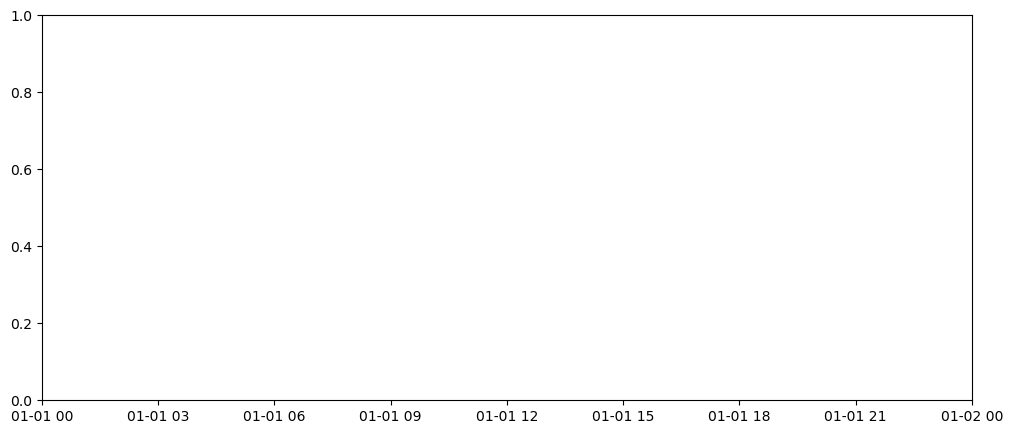

In [44]:
plt.figure(figsize=(12,5))
plt.plot(dates_clean[h:], U, color='red', label='Economic Damage Metric')
plt.title("Economic Damage Metric Over Time")
plt.xlabel("Date")
plt.ylabel("U")
plt.grid(True)
plt.legend()
plt.savefig("economic_damage_graph", dpi=300, bbox_inches="tight")
plt.show()

In [43]:
U = np.append(U, np.full(10, np.nan))
print(U)
%store U

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.00000000e-02 1.17082987e-01 0.00000000e+00 5.97766827e-02
 3.76608626e-01 2.62999294e-03 0.00000000e+00 0.00000000e+00
 6.47980978e-01 2.67997869e-01 0.00000000e+00 7.37613198e-01
 5.61060396e-02 1.97560180e-01 0.00000000e+00 5.17747509e-01
 0.00000000e+00 0.00000000e+00 3.12449267e-01 0.00000000e+00
 7.19721657e-02 0.00000000e+00 6.80883389e-01 0.00000000e+00
 2.17855070e-02 3.17319727e-01 2.30404328e-01 0.00000000e+00
 2.72402924e-02 2.38387172e-01 0.00000000e+00 1.34946492e-01
 0.00000000e+00 6.36533588e-01 0.00000000e+00 1.73791510e-01
 3.00091772e-01 0.00000000e+00 0.00000000e+00 1.62210400e-02
 1.01295140e-02 8.35098010e-02 4.17658379e-02 2.54624466e-01
 6.91569443e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.05707951e-02 0.00000000e+00
 0.00000000e+00 1.54116102e-01 0.00000000e+00 1.51352073e-01
 0.00000000e+00 0.00000000e+00 5.57001785e-01 0.00000000e+00
 0.00000000e+00 4.798021